In [1]:
import numpy as np
import pyreadr
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import textwrap

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

from utils import pca

In [2]:
path = "./gss_16.rda"

In [3]:
data = pyreadr.read_r(path)

In [4]:
df = data["gss16"]

In [5]:
df

,harass5,emailmin,emailhr,educ,polviews,advfront,snapchat,instagrm,wrkstat
0,NaN,0.0,12.0,16.0,Moderate,Strongly agree,NaN,NaN,Working fulltime
1,NaN,30.0,0.0,12.0,Liberal,Disagree,No,No,Working fulltime
2,No,NaN,NaN,16.0,Conservative,NaN,No,No,Retired
3,NaN,10.0,0.0,12.0,Moderate,Disagree,NaN,NaN,Working parttime
4,No,NaN,NaN,18.0,Slightly liberal,NaN,Yes,Yes,Working parttime
...,...,...,...,...,...,...,...,...,...
2862,NaN,0.0,20.0,20.0,Extremely liberal,Agree,No,Yes,Working fulltime
2863,NaN,0.0,2.0,15.0,Conservative,Disagree,NaN,NaN,Working fulltime
2864,No,0.0,0.0,14.0,Moderate,NaN,NaN,NaN,Keeping house
2865,NaN,0.0,1.0,14.0,Slghtly conservative,Agree,NaN,NaN,Working fulltime


In [6]:
df.shape

(2867, 9)

In [7]:
for col in df.columns.tolist():
    print(col, df[col].isna().sum(), len(df[col]), df[col].isna().sum()/len(df[col]))

harass5 1398 2867 0.48761771886989885
emailmin 1218 2867 0.4248343215905127
emailhr 1218 2867 0.4248343215905127
educ 9 2867 0.003139169863969306
polviews 111 2867 0.0387164283222881
advfront 1482 2867 0.5169166376002791
snapchat 1495 2867 0.5214509940704569
instagrm 1495 2867 0.5214509940704569
wrkstat 3 2867 0.0010463899546564353


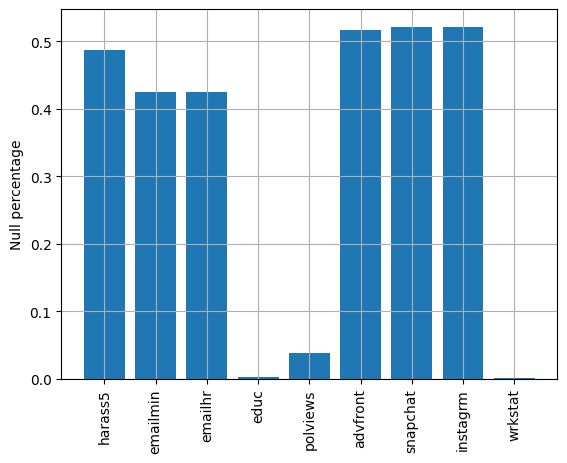

In [8]:
col_to_null_percentage = dict(zip(df.columns.tolist(), map(lambda x: df[x].isna().sum()/len(df[x]), df.columns.tolist())))

plt.bar(col_to_null_percentage.keys(), col_to_null_percentage.values())
plt.xticks(rotation=90)
plt.ylabel("Null percentage")
plt.grid()
plt.show()

In [9]:
columns_to_check = ['educ', 'wrkstat']
df.dropna(subset=columns_to_check, inplace=True)

In [10]:
df.shape

(2858, 9)

In [11]:
for col in df.columns.tolist():
    try:
        print(col, np.unique(df[col].to_numpy()))
    except:
        print(col, list(set(df[col].tolist())))

harass5 [nan, 'Yes', 'No', 'Does not apply (i do not have a job/superior/co-worker)']
emailmin [ 0.  1.  2.  5. 10. 15. 20. 25. 30. 40. 45. 48. 50. 59. nan]
emailhr [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  12.  14.  15.
  16.  17.  18.  20.  21.  22.  24.  25.  28.  30.  32.  35.  36.  40.
  42.  44.  45.  47.  48.  50.  56.  60.  70.  72.  75.  90. 100.  nan]
educ [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.]
polviews [nan, 'Slghtly conservative', 'Slightly liberal', 'Conservative', 'Extrmly conservative', 'Extremely liberal', 'Moderate', 'Liberal']
advfront ['Strongly agree', nan, 'Agree', 'Disagree', 'Dont know', 'Strongly disagree']
snapchat [nan, 'Yes', 'No']
instagrm [nan, 'Yes', 'No']
wrkstat ['Keeping house' 'Other' 'Retired' 'School' 'Temp not working'
 'Unempl, laid off' 'Working fulltime' 'Working parttime']


In [12]:
#df.drop(df[df["harass5"] == "Does not apply (i do not have a job/superior/co-worker)"].index, inplace=True)

In [13]:
column_unique_value = {}
for col in df.columns.tolist():
    try:
        print(col, np.unique(df[col].to_numpy()))
        column_unique_value[col] = np.unique(df[col].to_numpy())
    except:
        print(col, list(set(df[col].tolist())))
        column_unique_value[col] = list(set(df[col].tolist()))

harass5 [nan, 'Yes', 'No', 'Does not apply (i do not have a job/superior/co-worker)']
emailmin [ 0.  1.  2.  5. 10. 15. 20. 25. 30. 40. 45. 48. 50. 59. nan]
emailhr [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  12.  14.  15.
  16.  17.  18.  20.  21.  22.  24.  25.  28.  30.  32.  35.  36.  40.
  42.  44.  45.  47.  48.  50.  56.  60.  70.  72.  75.  90. 100.  nan]
educ [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.]
polviews [nan, 'Slghtly conservative', 'Slightly liberal', 'Conservative', 'Extrmly conservative', 'Extremely liberal', 'Moderate', 'Liberal']
advfront ['Strongly agree', nan, 'Agree', 'Disagree', 'Dont know', 'Strongly disagree']
snapchat [nan, 'Yes', 'No']
instagrm [nan, 'Yes', 'No']
wrkstat ['Keeping house' 'Other' 'Retired' 'School' 'Temp not working'
 'Unempl, laid off' 'Working fulltime' 'Working parttime']


In [14]:
value_to_index = {}

for col in df.columns.tolist():
    try:
        unique_set = np.unique(df[col].to_numpy()).tolist()
        unique_set = [x for x in unique_set if not math.isnan(x)]
        print(col, unique_set)
        unique_set.sort()
        value_to_index[col] = dict(zip(unique_set, unique_set))
    except:
        #print(col, list(set(df[col].tolist())))
        unique_set = list(set(df[col].tolist()))
        chosens = []
        for i in unique_set:
            if isinstance(i, float):
                if math.isnan(i):
                    continue
            #print(type(i), i)
            chosens.append(i)
        unique_set = chosens
        
        print(col, unique_set)
        unique_set.sort()
    
        if col == "advfront":
            value_to_index[col] = {'Strongly disagree': 1, 'Disagree': 2, 'Dont know': 3, 'Agree': 4, 'Strongly agree': 5}
        elif col == "polviews":
            value_to_index[col] = {'Extrmly conservative': 1, 'Conservative': 2, 'Slghtly conservative': 3, 'Moderate': 4, 'Slightly liberal': 5, 'Liberal': 6, 'Extremely liberal': 7}
        elif col == "educ" or col == "wrkstat":
            value_to_index[col] = dict(zip(unique_set, range(len(unique_set))))
        else:
            value_to_index[col] = dict(zip(unique_set, range(1, len(unique_set) + 1)))
        
print(value_to_index)

harass5 ['Yes', 'No', 'Does not apply (i do not have a job/superior/co-worker)']
emailmin [0.0, 1.0, 2.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 40.0, 45.0, 48.0, 50.0, 59.0]
emailhr [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 12.0, 14.0, 15.0, 16.0, 17.0, 18.0, 20.0, 21.0, 22.0, 24.0, 25.0, 28.0, 30.0, 32.0, 35.0, 36.0, 40.0, 42.0, 44.0, 45.0, 47.0, 48.0, 50.0, 56.0, 60.0, 70.0, 72.0, 75.0, 90.0, 100.0]
educ [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]
polviews ['Slghtly conservative', 'Slightly liberal', 'Conservative', 'Extrmly conservative', 'Extremely liberal', 'Moderate', 'Liberal']
advfront ['Strongly agree', 'Agree', 'Disagree', 'Dont know', 'Strongly disagree']
snapchat ['Yes', 'No']
instagrm ['Yes', 'No']
wrkstat ['Unempl, laid off', 'Other', 'Retired', 'School', 'Keeping house', 'Working fulltime', 'Temp not working', 'Working parttime']
{'harass5': {'Does not apply (i do not have a job/superior

C:\Users\Thanh_Tuyet\AppData\Local\Temp\ipykernel_14476\558741408.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(wrapped_labels, rotation=90, ha="center")
C:\Users\Thanh_Tuyet\AppData\Local\Temp\ipykernel_14476\558741408.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(wrapped_labels, rotation=90, ha="center")
C:\Users\Thanh_Tuyet\AppData\Local\Temp\ipykernel_14476\558741408.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(wrapped_labels, rotation=90, ha="center")
C:\Users\Thanh_Tuyet\AppData\Local\Temp\ipykernel_14476\558741408.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(wrapped_labels, rotation=90, ha="center")
C:\Users\Thanh_Tuyet\AppData\Local\Temp\ipykernel_14476\558741408.py:14: UserWarning: FixedFormatter should only be used together with F

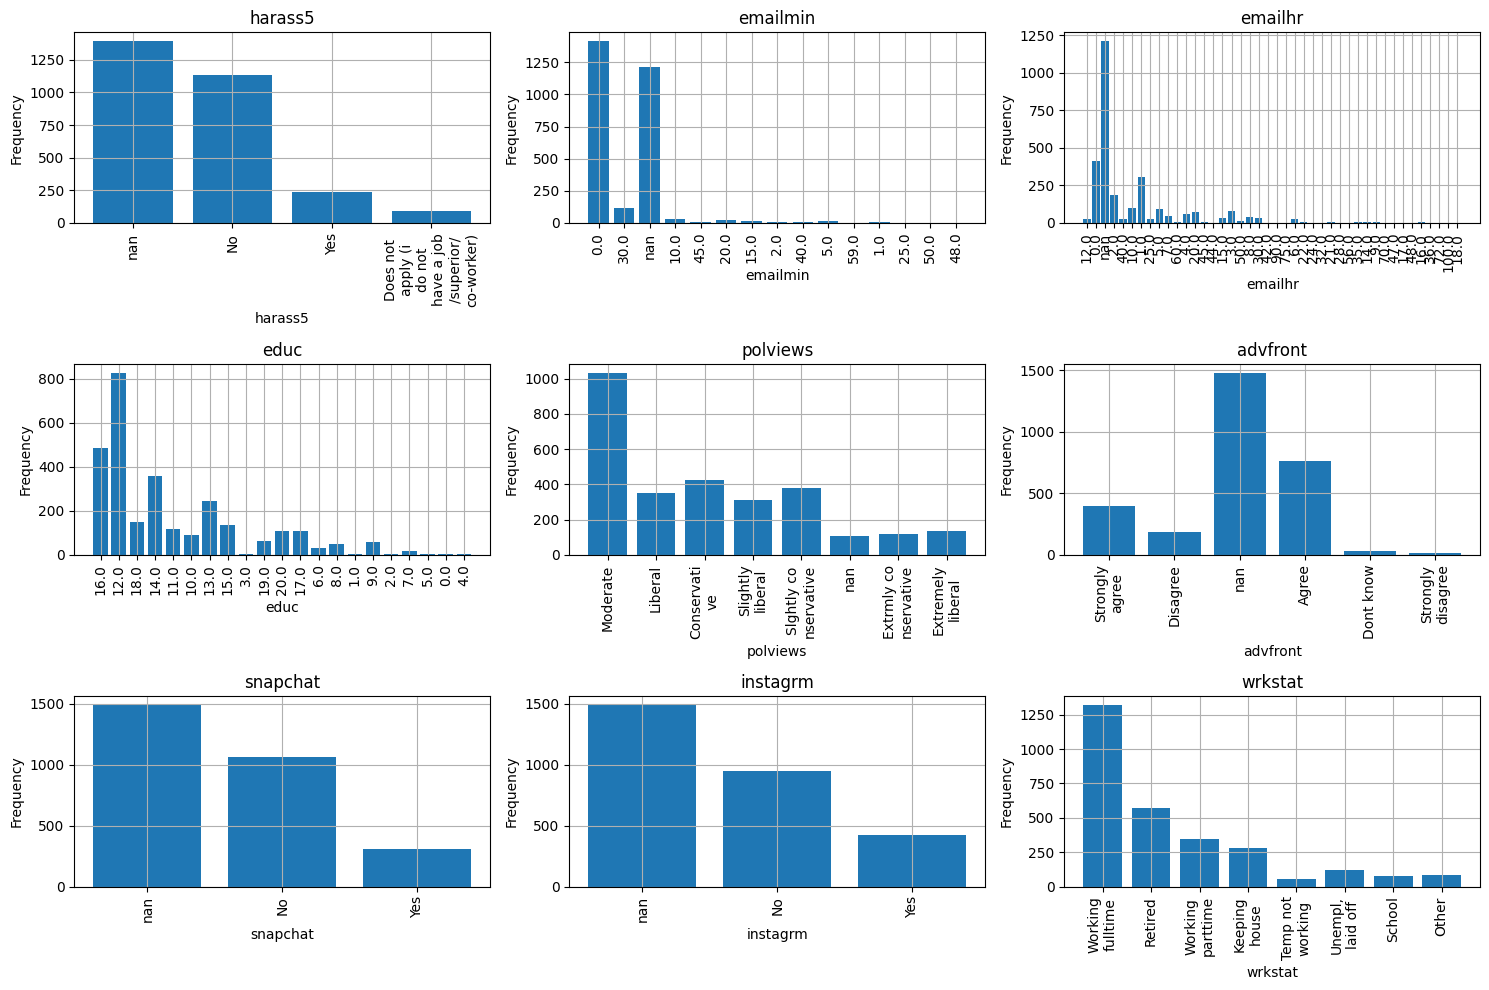

In [15]:
fields_to_plot = df.columns.tolist()

num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

axes = axes.ravel()

for i, field in enumerate(fields_to_plot):
    #sns.countplot(x=field, data=df, ax=axes[i])
    value_counts = df[field].value_counts(dropna=False, sort=False)
    axes[i].bar(value_counts.index.astype(str), value_counts.values)
    wrapped_labels = [textwrap.fill(label, 10) for label in value_counts.index.astype(str)]
    axes[i].set_xticklabels(wrapped_labels, rotation=90, ha="center")
    axes[i].set_title(f"{field}")
    axes[i].set_xlabel(field)
    axes[i].set_ylabel("Frequency")
    axes[i].grid()
    

for j in range(len(fields_to_plot), num_rows * num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()

C:\Users\Thanh_Tuyet\AppData\Local\Temp\ipykernel_14476\240902212.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(wrapped_labels, rotation=90, ha="center")
C:\Users\Thanh_Tuyet\AppData\Local\Temp\ipykernel_14476\240902212.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(wrapped_labels, rotation=90, ha="center")
C:\Users\Thanh_Tuyet\AppData\Local\Temp\ipykernel_14476\240902212.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(wrapped_labels, rotation=90, ha="center")
C:\Users\Thanh_Tuyet\AppData\Local\Temp\ipykernel_14476\240902212.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(wrapped_labels, rotation=90, ha="center")
C:\Users\Thanh_Tuyet\AppData\Local\Temp\ipykernel_14476\240902212.py:49: UserWarning: FixedFormatter should only be used together with F

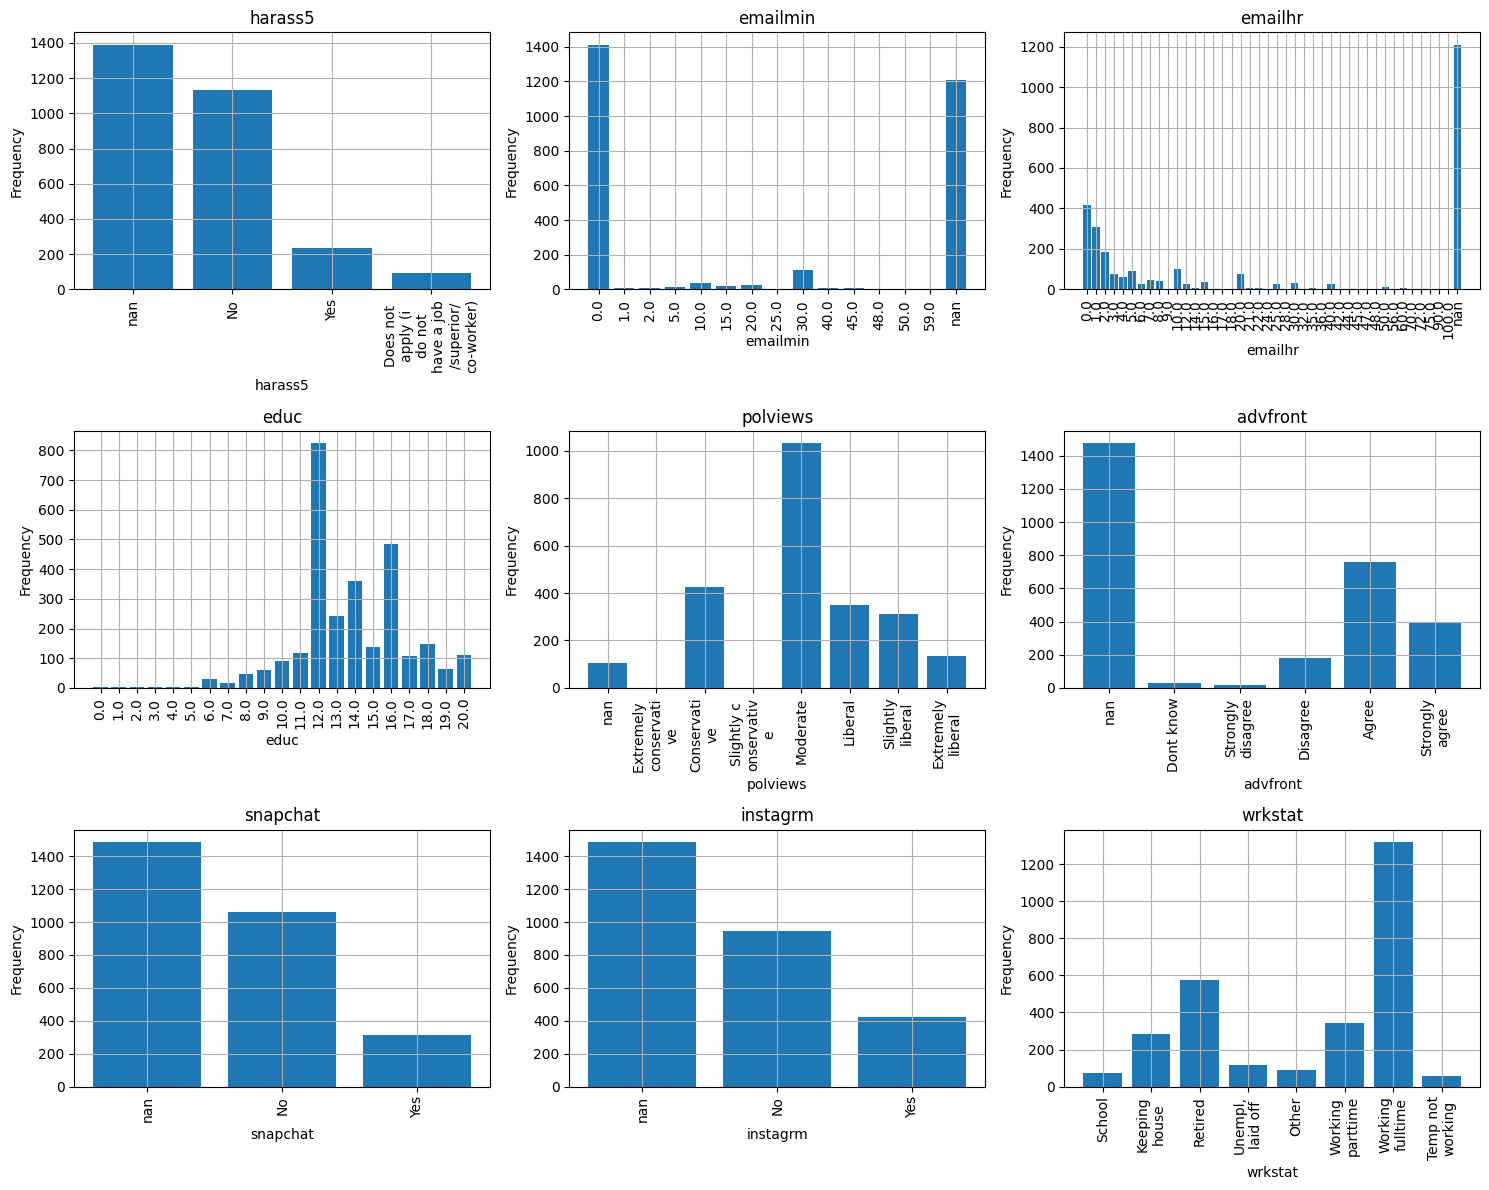

In [16]:
# column_unique_value = {
#     'harass5': [float('nan'), 'No', 'Yes', 'Does not apply (i do not have a job/superior/co-worker)'],
#     'emailmin': [float('nan'), 0., 1., 2., 5., 10., 15., 20., 25., 30., 40., 45., 48., 50., 59.],
#     'emailhr': [float('nan'), 0., 1., 2., 3., 4., 5., 6., 7., 8., 9., 10., 12., 14., 15., 16., 17., 18., 20., 21., 22.,
#                 24., 25., 28., 30., 32., 35., 36., 40., 42., 44., 45., 47., 48., 50., 56., 60., 70., 72.,
#                 75., 90., 100.],
#     'educ': [float('nan'), 0., 1., 2., 3., 4., 5., 6., 7., 8., 9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.,
#              20.],
#     'polviews': [float('nan'), 'Extremely conservative', 'Conservative', 'Slightly conservative', 'Moderate', 'Liberal',
#                  'Slightly liberal', 'Extremely liberal'],
#     'advfront': [float('nan'), 'Dont know', 'Strongly disagree', 'Disagree', 'Agree', 'Strongly agree'],
#     'snapchat': [float('nan'), 'No', 'Yes'],
#     'instagrm': [float('nan'), 'No', 'Yes'],
#     'wrkstat': [float('nan'), 'School', 'Keeping house', 'Retired', 'Unempl, laid off', 'Other',
#                 'Working parttime', 'Working fulltime', 'Temp not working']
# }

column_unique_value['harass5'] = [float('nan'), 'No', 'Yes', 'Does not apply (i do not have a job/superior/co-worker)']
column_unique_value['polviews'] = [float('nan'), 'Extremely conservative', 'Conservative', 'Slightly conservative', 'Moderate', 'Liberal',
                  'Slightly liberal', 'Extremely liberal']
column_unique_value['advfront'] = [float('nan'), 'Dont know', 'Strongly disagree', 'Disagree', 'Agree', 'Strongly agree']
column_unique_value['snapchat'] = [float('nan'), 'No', 'Yes']
column_unique_value['instagrm'] = [float('nan'), 'No', 'Yes']
column_unique_value['wrkstat'] = [float('nan'), 'School', 'Keeping house', 'Retired', 'Unempl, laid off', 'Other',
                 'Working parttime', 'Working fulltime', 'Temp not working']

# Get the list of categorical columns
categorical_columns = df.columns.tolist()

# Calculate the number of rows and columns needed for subplots
num_rows = (len(categorical_columns) + 2) // 3
num_cols = min(len(categorical_columns), 3)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

# Flatten the axes array
axes = axes.ravel()

# Loop through each categorical column and create the bar plot
for i, column in enumerate(categorical_columns):
    # Count the occurrences of each value (including NaN) in the column
    #sns.countplot(x=column, data=df, ax=axes[i])
    value_counts = df[column].value_counts(dropna=False, sort=False).sort_index()
    custom_order = column_unique_value.get(column, value_counts.index)
    value_counts = value_counts.reindex(custom_order)
    axes[i].bar(value_counts.index.astype(str), value_counts.values)
    wrapped_labels = [textwrap.fill(label, 10) for label in value_counts.index.astype(str)]
    axes[i].set_xticklabels(wrapped_labels, rotation=90, ha="center")
    # Set the plot labels and title for the current subplot
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")
    axes[i].set_title(f"{column}")
    axes[i].grid()

# Hide any empty subplots if needed
if len(categorical_columns) % 3 != 0:
    for i in range(len(categorical_columns) % 3, 3):
        fig.delaxes(axes[-i - 1])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [17]:
column_unique_value

{'harass5': [nan,
  'No',
  'Yes',
  'Does not apply (i do not have a job/superior/co-worker)'],
 'emailmin': array([ 0.,  1.,  2.,  5., 10., 15., 20., 25., 30., 40., 45., 48., 50.,
        59., nan]),
 'emailhr': array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         12.,  14.,  15.,  16.,  17.,  18.,  20.,  21.,  22.,  24.,  25.,
         28.,  30.,  32.,  35.,  36.,  40.,  42.,  44.,  45.,  47.,  48.,
         50.,  56.,  60.,  70.,  72.,  75.,  90., 100.,  nan]),
 'educ': array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]),
 'polviews': [nan,
  'Extremely conservative',
  'Conservative',
  'Slightly conservative',
  'Moderate',
  'Liberal',
  'Slightly liberal',
  'Extremely liberal'],
 'advfront': [nan,
  'Dont know',
  'Strongly disagree',
  'Disagree',
  'Agree',
  'Strongly agree'],
 'snapchat': [nan, 'No', 'Yes'],
 'instagrm': [nan, 'No', 'Yes'],
 'wrkstat': [nan,
  'School',
  'Kee

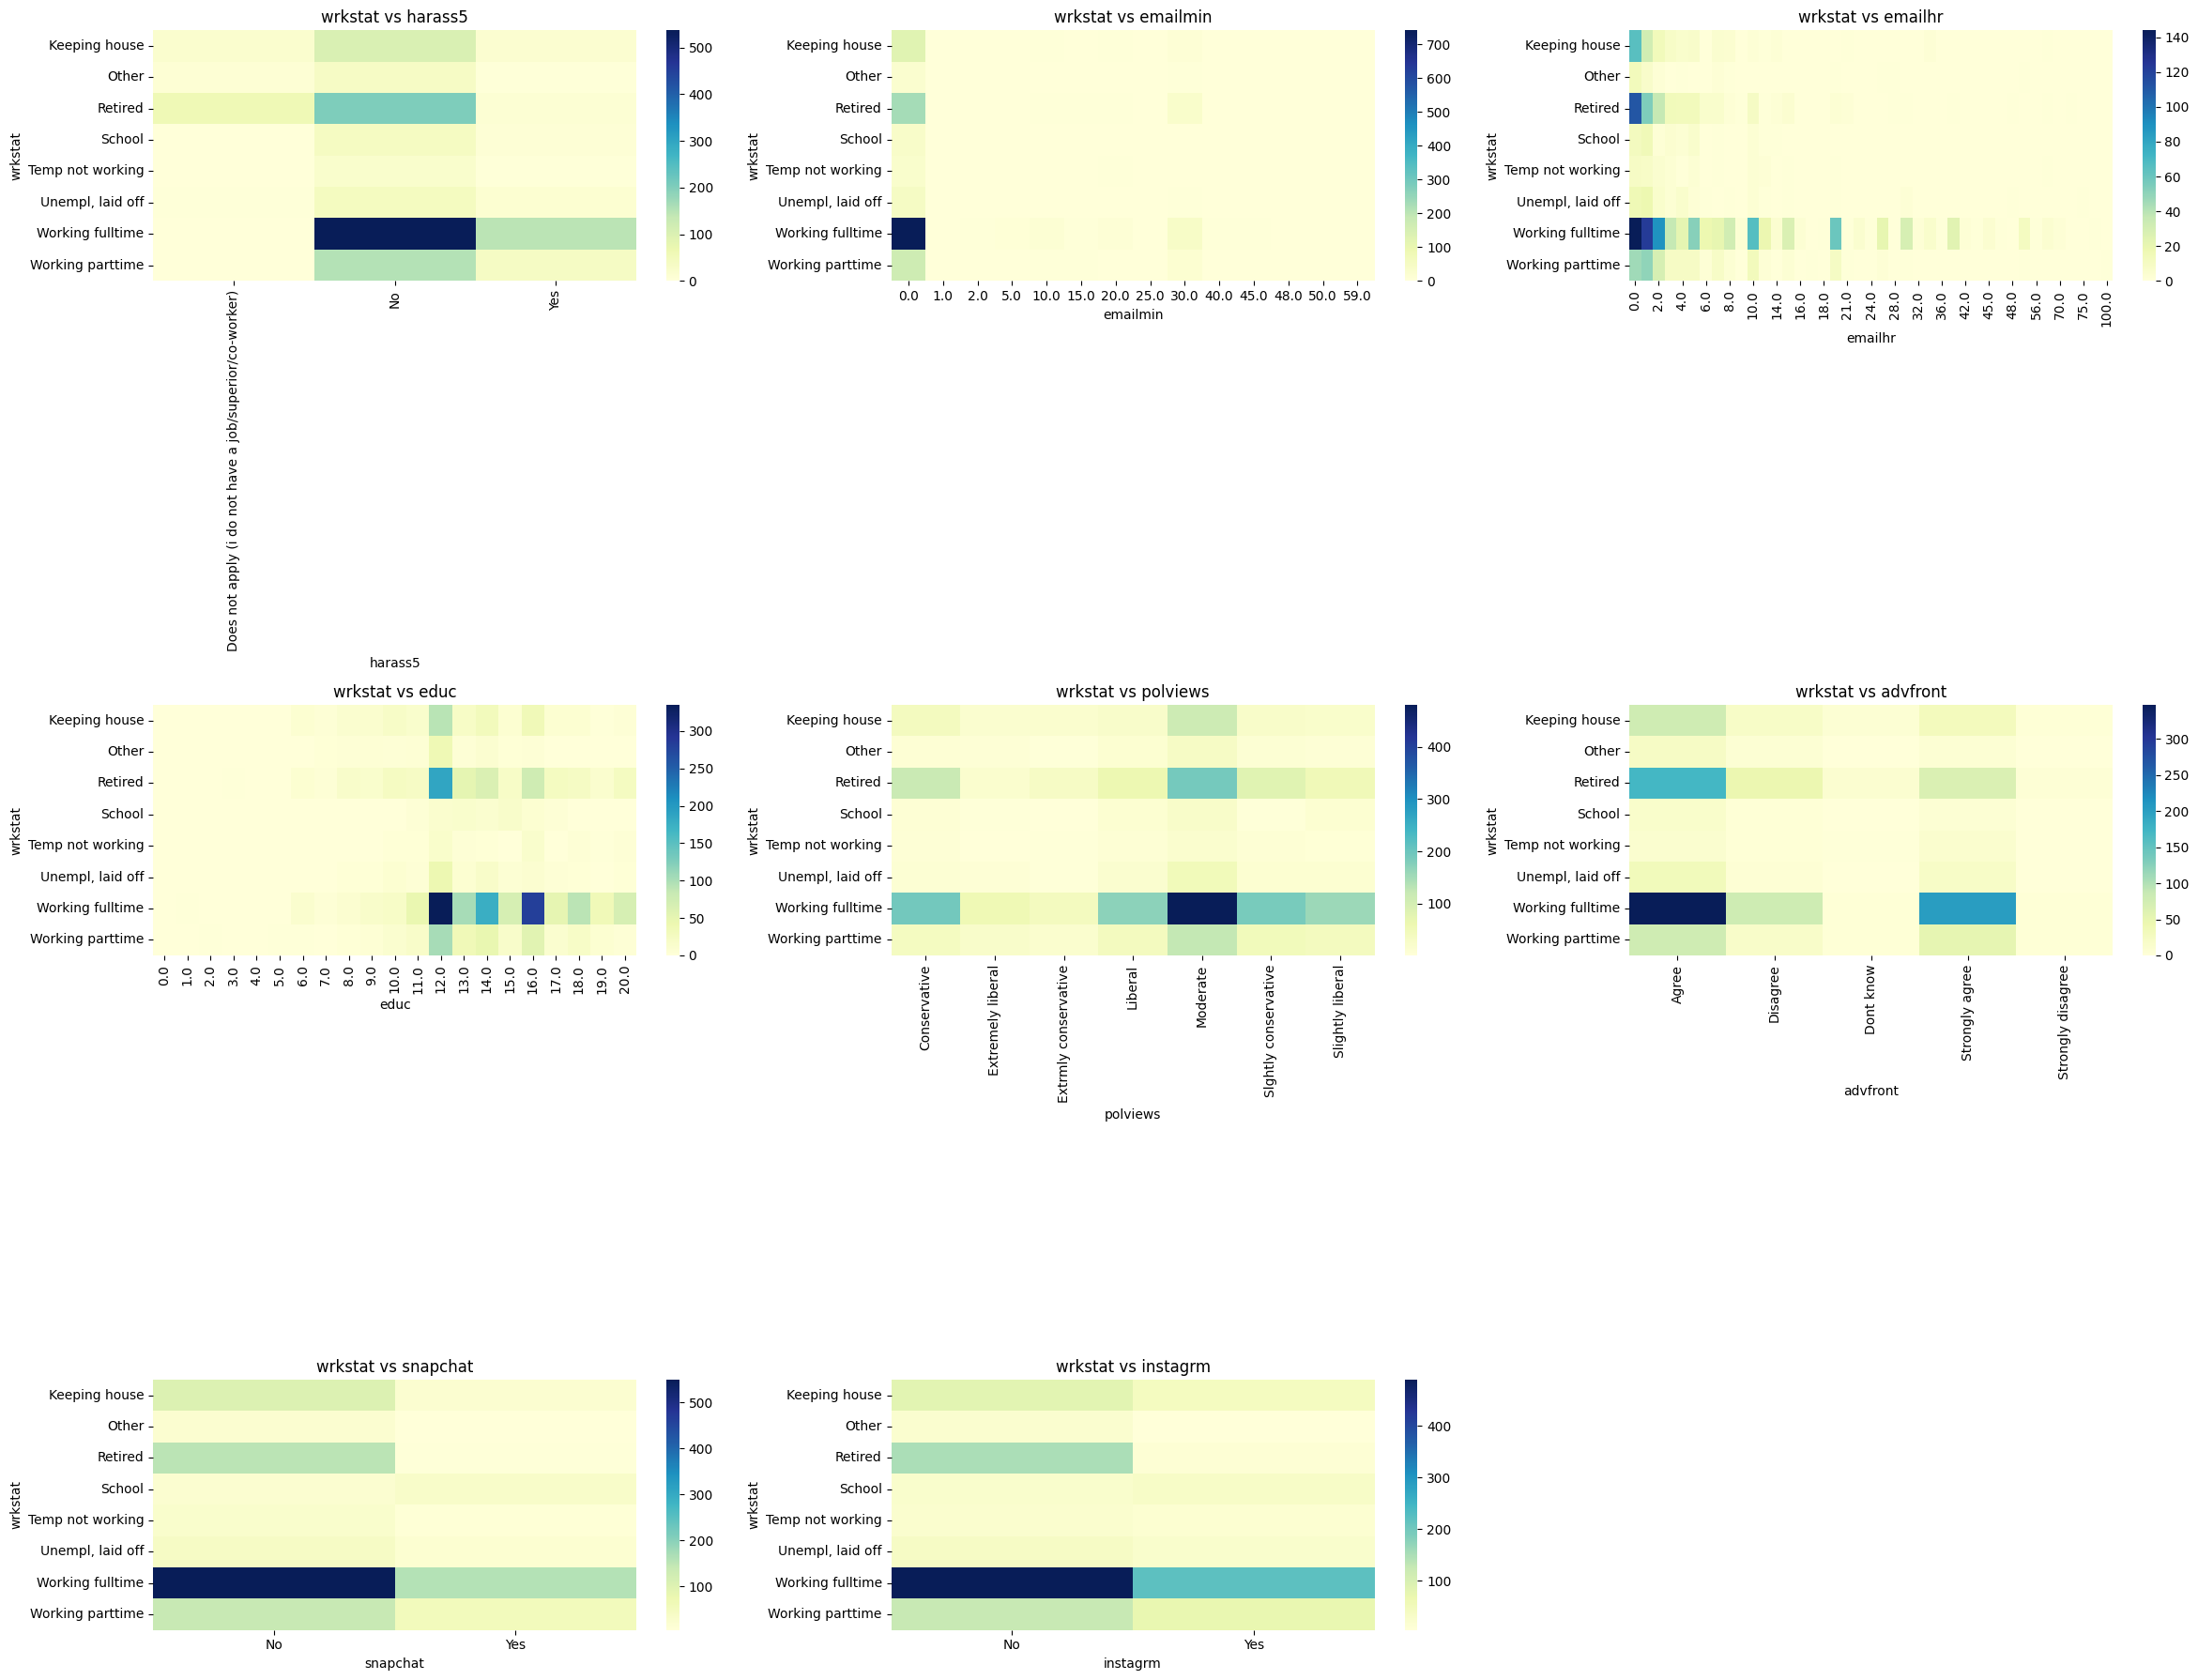

In [18]:
considered_columns = [col for col in column_unique_value if col != 'wrkstat']

num_subplots = len(considered_columns)
num_cols = 3  # Number of subplots per row
num_rows = (num_subplots + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(24, 6 * num_rows))

axes = axes.ravel()

for i, column in enumerate(considered_columns):
    # Create a co-occurrence matrix between 'wrkstat' and the current column
    co_occurrence_matrix = pd.crosstab(df['wrkstat'], df[column])
    # Plot the heatmap in the current subplot
    sns.heatmap(co_occurrence_matrix, annot=False, cmap='YlGnBu', cbar=True, ax=axes[i])
    axes[i].set_title(f'wrkstat vs {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('wrkstat')
    #plt.tight_layout()

for j in range(len(considered_columns), num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()

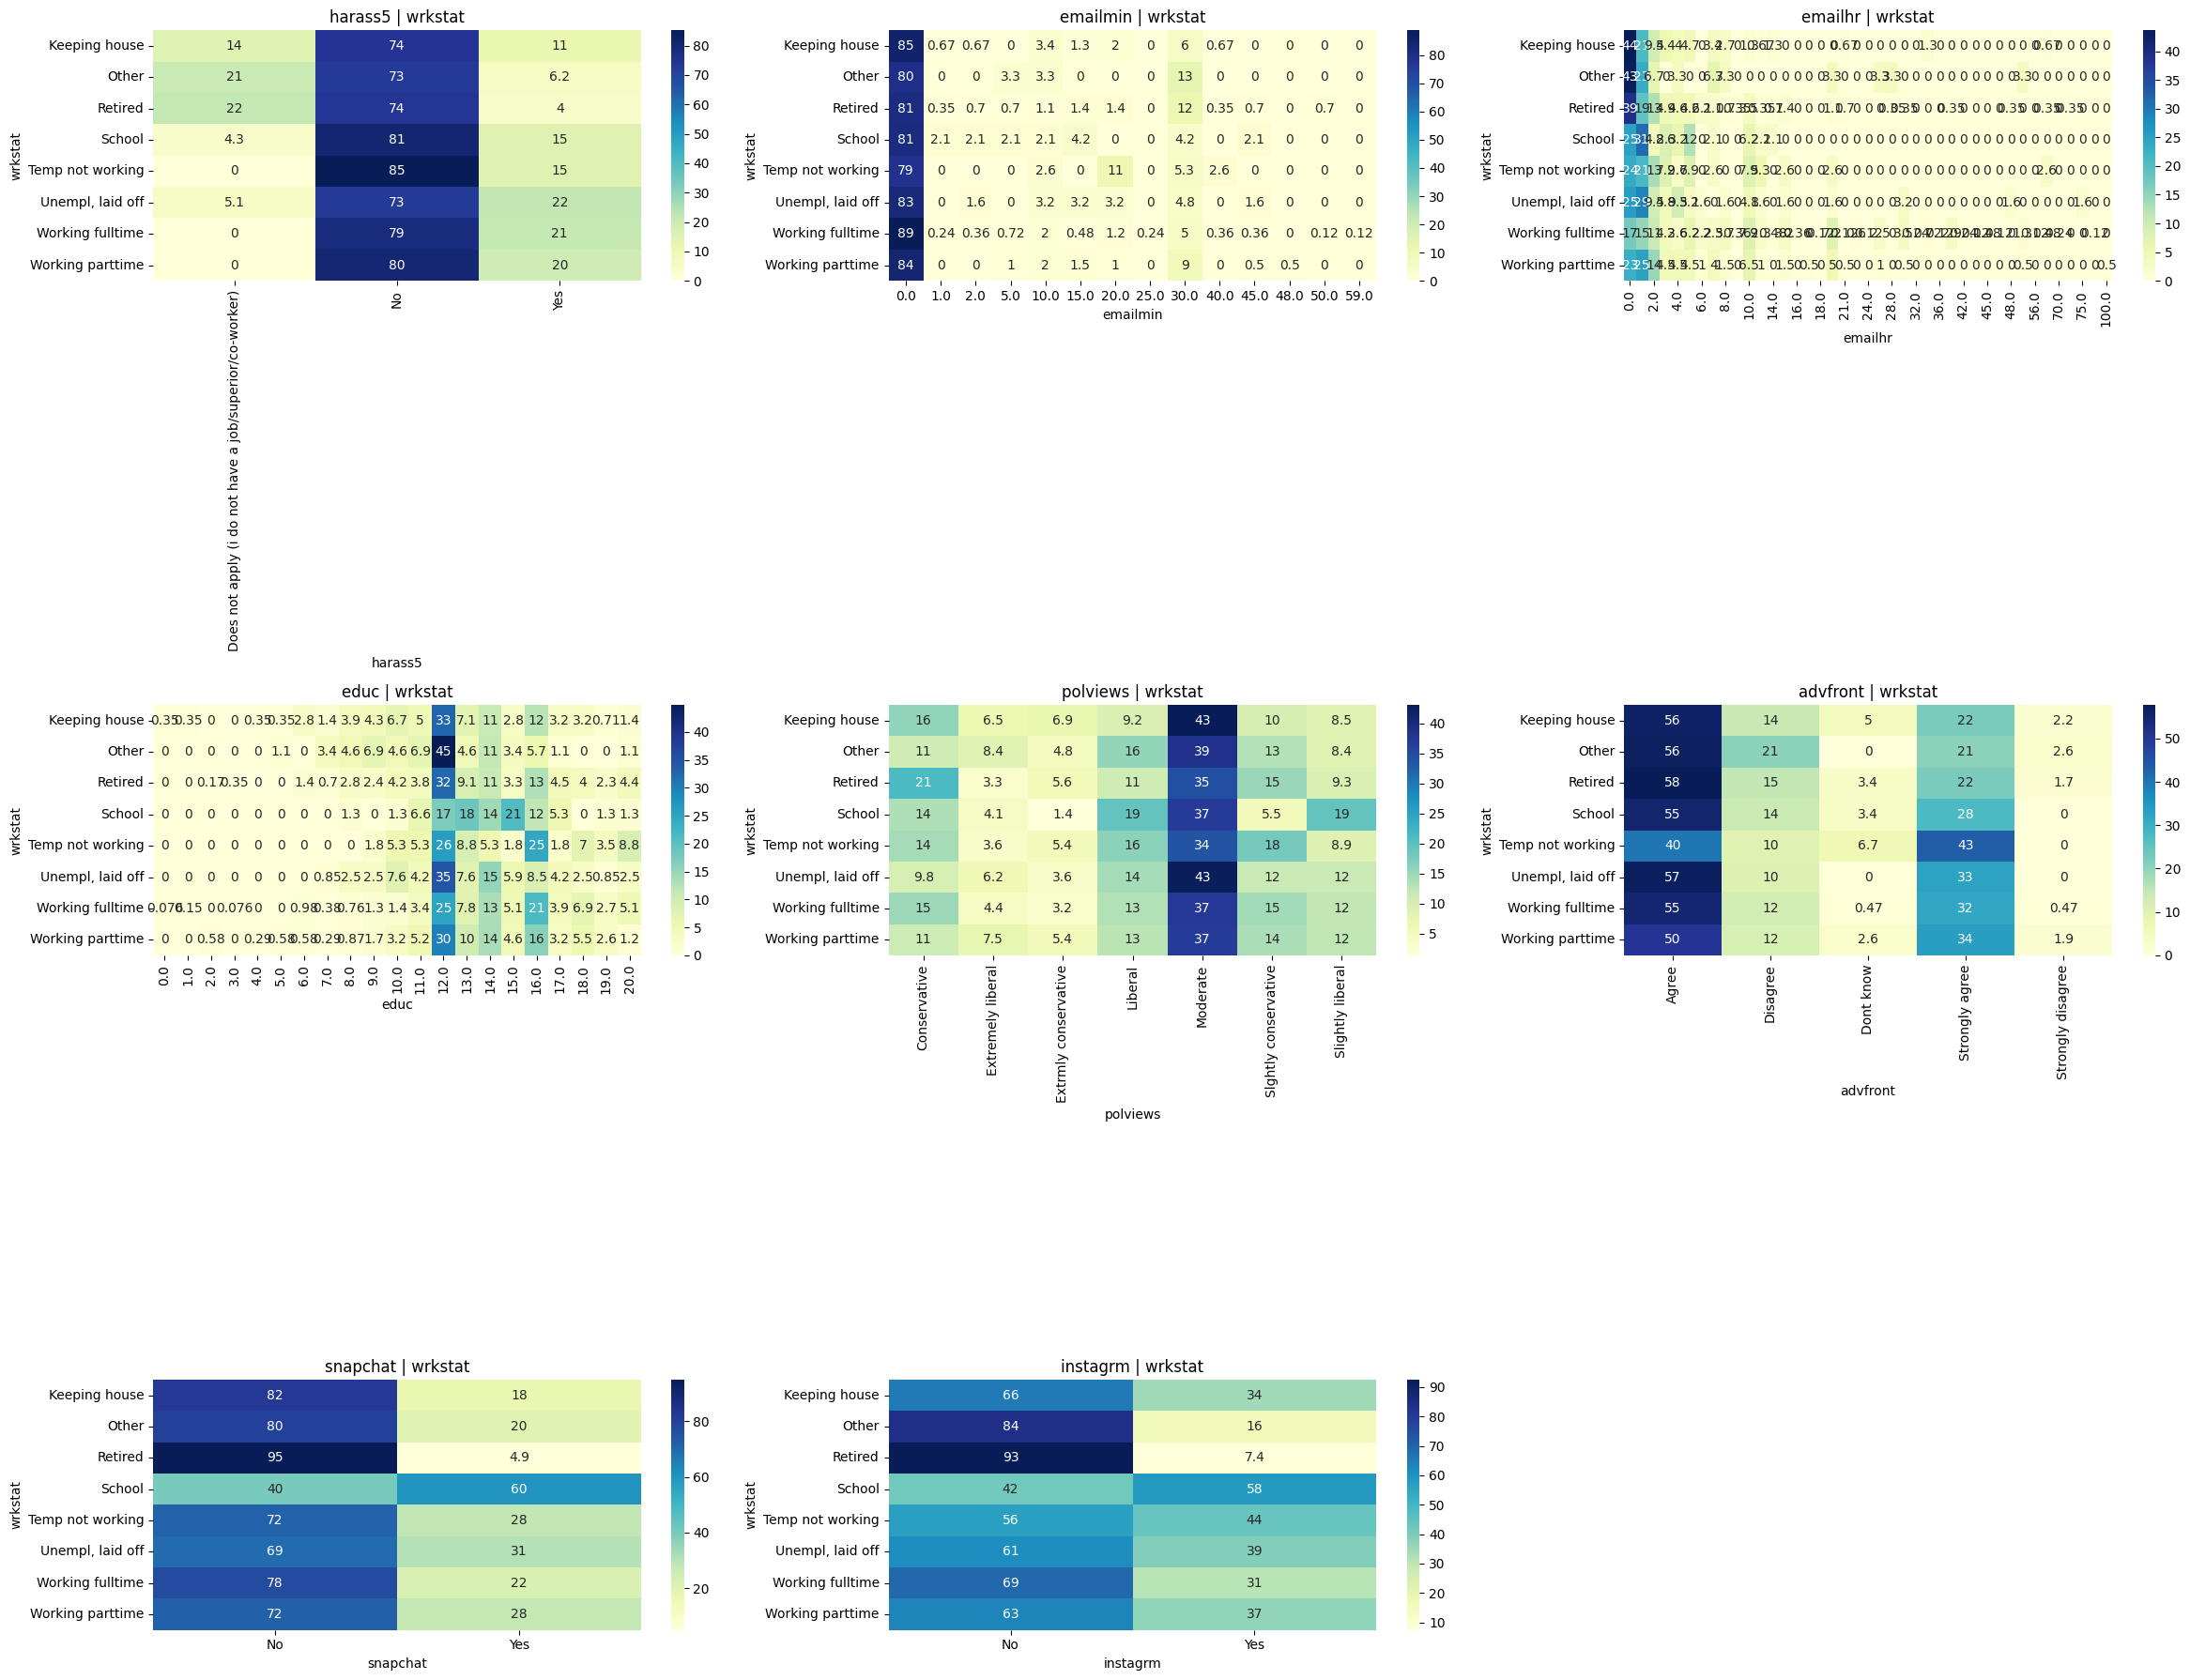

In [19]:
considered_columns = [col for col in column_unique_value if col != 'wrkstat']

num_subplots = len(considered_columns)
num_cols = 3  # Number of subplots per row
num_rows = (num_subplots + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(24, 6 * num_rows))

axes = axes.ravel()

for i, column in enumerate(considered_columns):
    # Create a co-occurrence matrix between 'wrkstat' and the current column
    co_occurrence_matrix = pd.crosstab(df['wrkstat'], df[column])
    percentages = co_occurrence_matrix.div(co_occurrence_matrix.sum(axis=1), axis=0) * 100
    # Plot the heatmap in the current subplot
    sns.heatmap(percentages, annot=True, cmap='YlGnBu', cbar=True, ax=axes[i])
    axes[i].set_title(f'{column} | wrkstat')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('wrkstat')
    #plt.tight_layout()
    
for j in range(len(considered_columns), num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()

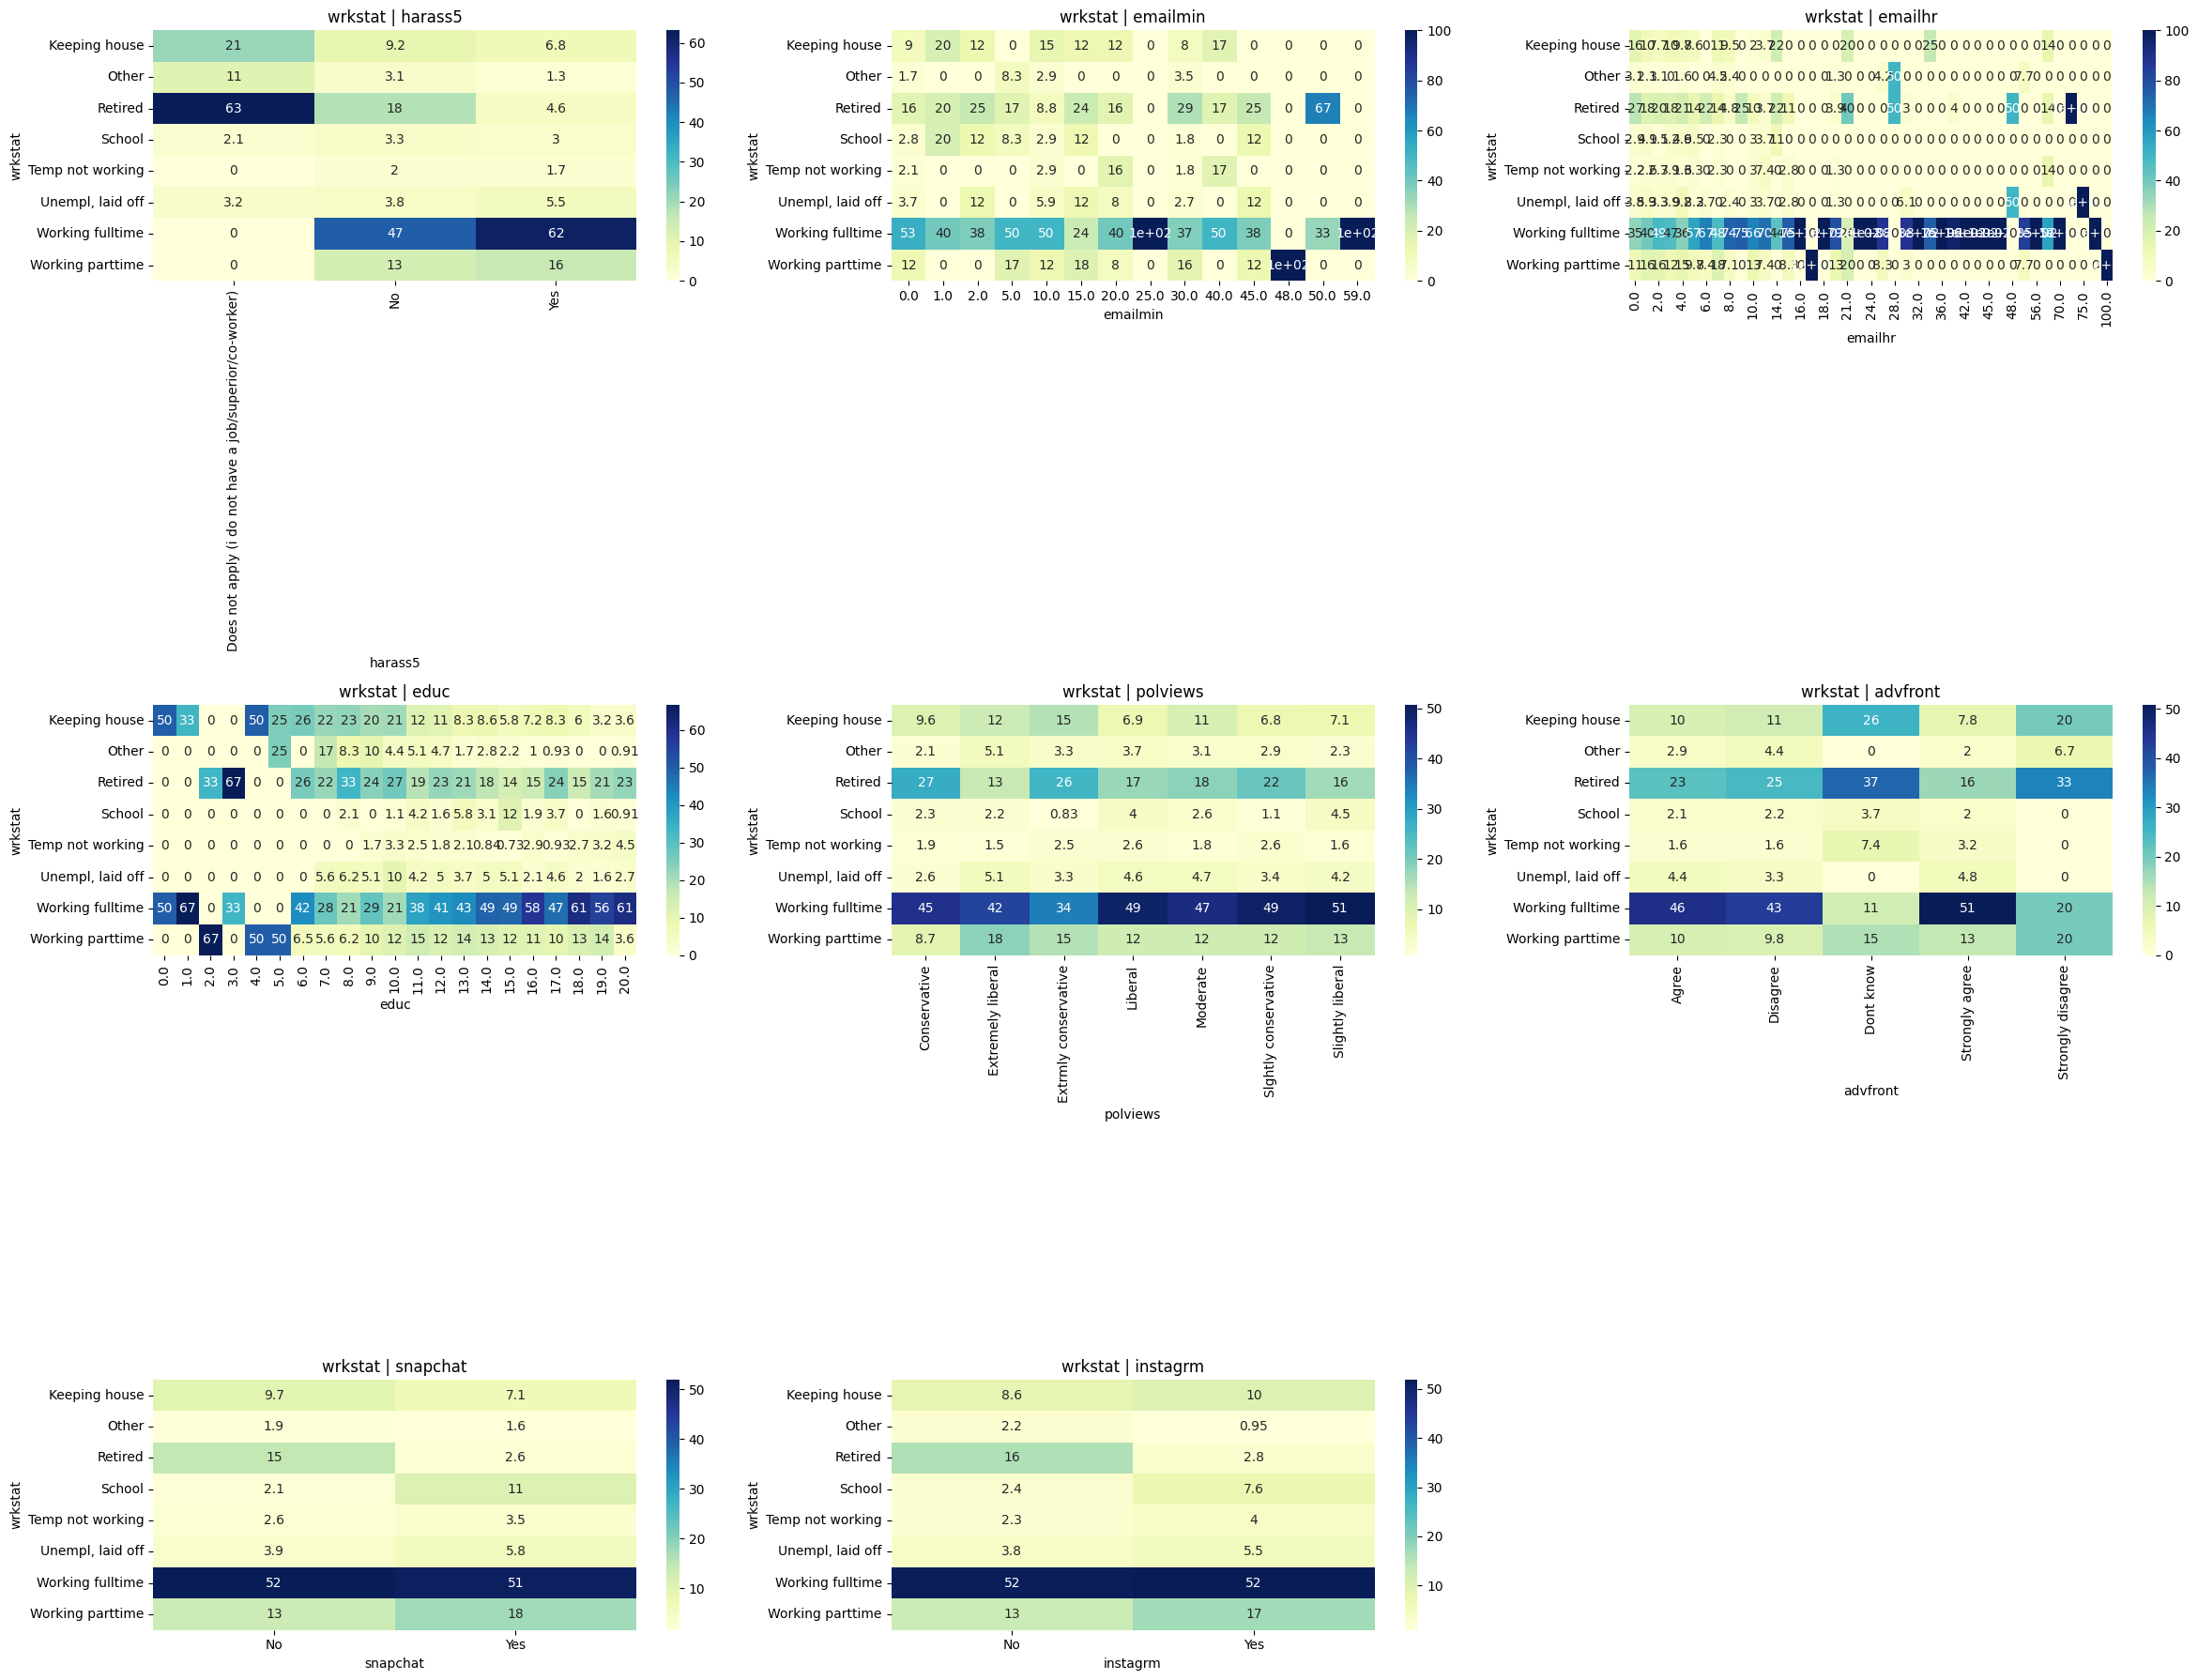

In [20]:
considered_columns = [col for col in column_unique_value if col != 'wrkstat']

num_subplots = len(considered_columns)
num_cols = 3  # Number of subplots per row
num_rows = (num_subplots + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(24, 6 * num_rows))

axes = axes.ravel()

for i, column in enumerate(considered_columns):
    # Create a co-occurrence matrix between 'wrkstat' and the current column
    co_occurrence_matrix = pd.crosstab(df['wrkstat'], df[column])
    percentages = co_occurrence_matrix.div(co_occurrence_matrix.sum(axis=0), axis=1) * 100
    # Plot the heatmap in the current subplot
    sns.heatmap(percentages, annot=True, cmap='YlGnBu', cbar=True, ax=axes[i])
    axes[i].set_title(f'wrkstat | {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('wrkstat')
    #plt.tight_layout()
    
for j in range(len(considered_columns), num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()

In [21]:
for col in df.columns.tolist():
    df[col] = df[col].map(value_to_index[col])

In [22]:
df

,harass5,emailmin,emailhr,educ,polviews,advfront,snapchat,instagrm,wrkstat
0,NaN,0.0,12.0,16.0,4.0,5.0,NaN,NaN,6
1,NaN,30.0,0.0,12.0,6.0,2.0,1.0,1.0,6
2,2.0,NaN,NaN,16.0,2.0,NaN,1.0,1.0,2
3,NaN,10.0,0.0,12.0,4.0,2.0,NaN,NaN,7
4,2.0,NaN,NaN,18.0,5.0,NaN,2.0,2.0,7
...,...,...,...,...,...,...,...,...,...
2862,NaN,0.0,20.0,20.0,7.0,4.0,1.0,2.0,6
2863,NaN,0.0,2.0,15.0,2.0,2.0,NaN,NaN,6
2864,2.0,0.0,0.0,14.0,4.0,NaN,NaN,NaN,0
2865,NaN,0.0,1.0,14.0,3.0,4.0,NaN,NaN,6


In [23]:
categorical_columns = ['harass5', 'polviews', 'advfront', 'snapchat', 'instagrm', 'wrkstat']

df[categorical_columns] = df[categorical_columns].fillna(0)
numerical_columns = ['emailmin', 'emailhr', 'educ']

df[numerical_columns] = df[numerical_columns].fillna(-1)

In [24]:
df

,harass5,emailmin,emailhr,educ,polviews,advfront,snapchat,instagrm,wrkstat
0,0.0,0.0,12.0,16.0,4.0,5.0,0.0,0.0,6
1,0.0,30.0,0.0,12.0,6.0,2.0,1.0,1.0,6
2,2.0,-1.0,-1.0,16.0,2.0,0.0,1.0,1.0,2
3,0.0,10.0,0.0,12.0,4.0,2.0,0.0,0.0,7
4,2.0,-1.0,-1.0,18.0,5.0,0.0,2.0,2.0,7
...,...,...,...,...,...,...,...,...,...
2862,0.0,0.0,20.0,20.0,7.0,4.0,1.0,2.0,6
2863,0.0,0.0,2.0,15.0,2.0,2.0,0.0,0.0,6
2864,2.0,0.0,0.0,14.0,4.0,0.0,0.0,0.0,0
2865,0.0,0.0,1.0,14.0,3.0,4.0,0.0,0.0,6


In [25]:
# for col in df.columns.tolist():
#     df[col] = df[col].astype(np.int16)
df["wrkstat"] = df["wrkstat"].astype(np.int16)

In [26]:
df

,harass5,emailmin,emailhr,educ,polviews,advfront,snapchat,instagrm,wrkstat
0,0.0,0.0,12.0,16.0,4.0,5.0,0.0,0.0,6
1,0.0,30.0,0.0,12.0,6.0,2.0,1.0,1.0,6
2,2.0,-1.0,-1.0,16.0,2.0,0.0,1.0,1.0,2
3,0.0,10.0,0.0,12.0,4.0,2.0,0.0,0.0,7
4,2.0,-1.0,-1.0,18.0,5.0,0.0,2.0,2.0,7
...,...,...,...,...,...,...,...,...,...
2862,0.0,0.0,20.0,20.0,7.0,4.0,1.0,2.0,6
2863,0.0,0.0,2.0,15.0,2.0,2.0,0.0,0.0,6
2864,2.0,0.0,0.0,14.0,4.0,0.0,0.0,0.0,0
2865,0.0,0.0,1.0,14.0,3.0,4.0,0.0,0.0,6


In [27]:
categorical_columns = ['harass5', 'snapchat', 'instagrm', 'polviews', 'advfront']
numerical_columns = ['emailmin', 'emailhr', 'educ']

df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=False)
#scaler = MinMaxScaler()
scaler = StandardScaler()

df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])
#df_encoded = scaler.fit_transform(df_encoded)

df_encoded

,emailmin,emailhr,educ,wrkstat,harass5_0.0,harass5_1.0,harass5_2.0,harass5_3.0,snapchat_0.0,snapchat_1.0,...,polviews_4.0,polviews_5.0,polviews_6.0,polviews_7.0,advfront_0.0,advfront_1.0,advfront_2.0,advfront_3.0,advfront_4.0,advfront_5.0
0,-0.202905,0.891987,0.763581,6,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,3.878041,-0.375008,-0.586235,6,1,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
2,-0.338936,-0.480590,0.763581,2,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,1.157410,-0.375008,-0.586235,7,1,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
4,-0.338936,-0.480590,1.438489,7,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2862,-0.202905,1.736650,2.113397,6,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2863,-0.202905,-0.163842,0.426127,6,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2864,-0.202905,-0.375008,0.088673,0,0,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,0
2865,-0.202905,-0.269425,0.088673,6,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [28]:
y = df_encoded["wrkstat"]
y = y.to_numpy()

x = df_encoded.drop("wrkstat", axis=1).to_numpy()
_, reduced_x = pca(x=x, alpha=0.6)

x.shape, y, reduced_x

((2858, 27),
 array([6, 6, 2, ..., 0, 6, 2], dtype=int16),
 array([[ 1.26816176+0.j,  0.89887854+0.j,  0.4430343 +0.j,
         -0.59626308+0.j],
        [ 1.15075404+0.j, -0.98081812+0.j, -3.42572469+0.j,
          1.62458812+0.j],
        [-1.53493218+0.j,  0.46870264+0.j, -0.35196181+0.j,
         -0.20413948+0.j],
        ...,
        [-0.25405175+0.j, -0.48389183+0.j,  0.26611388+0.j,
         -0.54811226+0.j],
        [ 0.99409808+0.j, -0.31206078+0.j,  0.29784672+0.j,
         -0.94109008+0.j],
        [-1.53578957+0.j,  0.46873747+0.j, -0.37148495+0.j,
         -0.17698816+0.j]]))

c:\Users\Thanh_Tuyet\.conda\envs\pytorch_tensorflow\lib\site-packages\matplotlib\collections.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


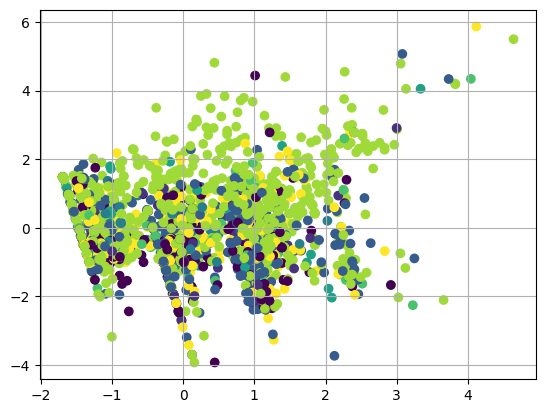

In [29]:
plt.scatter(reduced_x[:, 0], reduced_x[:, 1], c=y, cmap="viridis")
plt.grid()

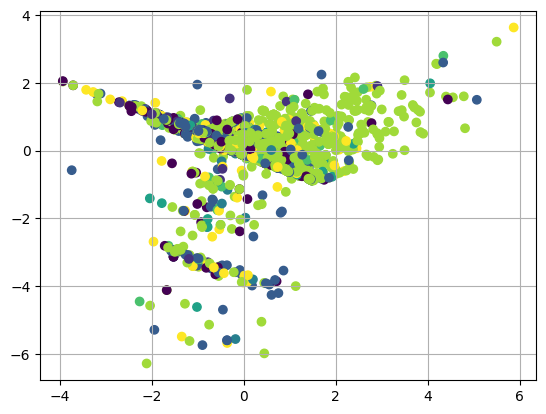

In [30]:
plt.scatter(reduced_x[:, 1], reduced_x[:, 2], c=y, cmap="viridis")
plt.grid()

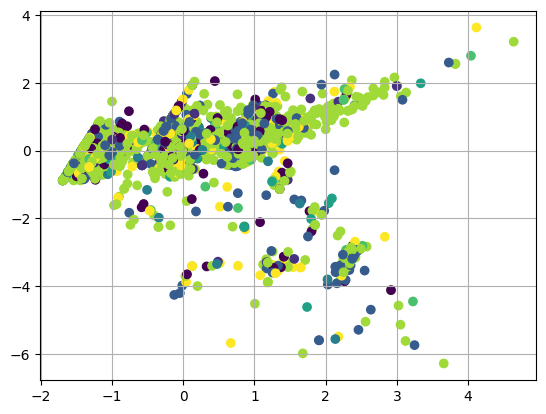

In [31]:
plt.scatter(reduced_x[:, 0], reduced_x[:, 2], c=y, cmap="viridis")
plt.grid()